# Binarizaition and Morphology


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
print(sys.version)
print(np.__version__)
print(cv2.__version__)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
1.19.2
4.0.1


(180, 173)

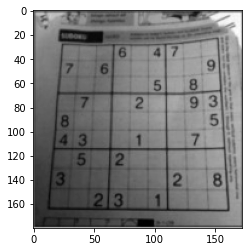

In [7]:
img = cv2.imread('sudoku.png', 0)
display(img.shape)
plt.imshow(img, cmap='gray')
plt.show()

## Binarization

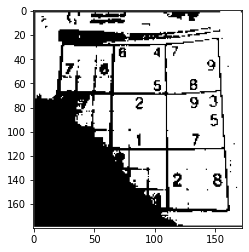

In [14]:
ret, dst = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
# cv2.THRESH_BINARY
# cv2.THRESH_BINARY_INV
# cv2.THRESH_TRUNC
# cv2.THRESH_TOZERO
# cv2.THRESH_TOZERO_INV
plt.imshow(dst, cmap='gray')
plt.show()

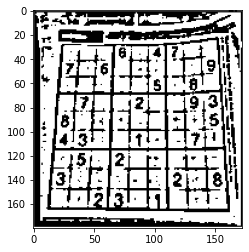

In [17]:
dst_adap = cv2.adaptiveThreshold(img, 255, 
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,
                         11, 2)
# cv2.ADAPTIVE_THRESH_MEAN_C
# cv2.ADAPTIVE_THRESH_GAUSSIAN_C
plt.show()

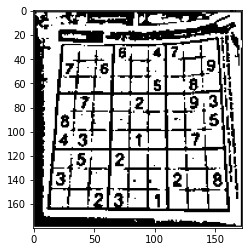

In [20]:
dst_adap = cv2.adaptiveThreshold(img, 255, 
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY,
                                 25, 2)
plt.imshow(dst_adap, cmap='gray')
plt.show()

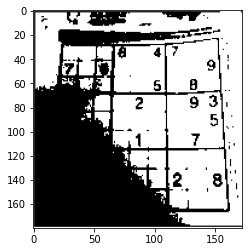

In [22]:
ret_o, dst_o = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(dst_o, cmap='gray')
plt.show()

In [23]:
ret_o

107.0

## Morphology

(183, 722)

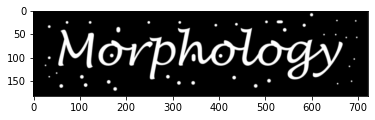

In [17]:
img_morp = cv2.imread("morphology2.png", 0)
display(img_morp.shape)
plt.imshow(img_morp, cmap='gray')
plt.show()

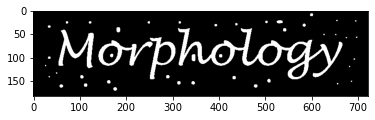

In [18]:
ret, th = cv2.threshold(img_morp, 127, 255, cv2.THRESH_BINARY)
plt.imshow(th, cmap='gray')
plt.show()

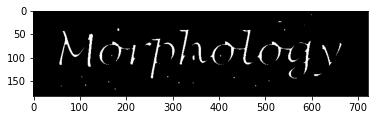

In [19]:
kernel = np.ones((5,5), dtype = np.uint8)

erosion = cv2.erode(th, kernel, iterations=1)
plt.imshow(erosion, cmap='gray')
plt.show()

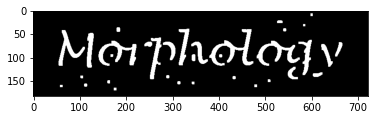

In [20]:
dilation = cv2.dilate(erosion, kernel, iterations = 1)
plt.imshow(dilation, cmap='gray')
plt.show()

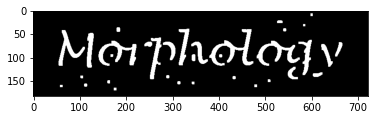

In [21]:
kernel = np.ones((5,5), dtype = np.uint8)

open = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=1)
plt.imshow(open, cmap='gray')
plt.show()

## Task - count numbers

(436, 580)

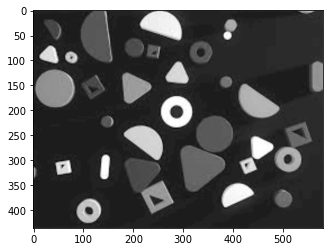

In [22]:
img = cv2.imread('count_objects.png', 0)
display(img.shape)
plt.imshow(img, cmap='gray')
plt.show()

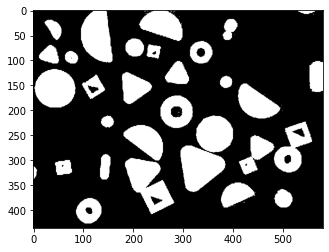

In [23]:
ret, dst = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY)
plt.imshow(dst, cmap='gray')
plt.show()

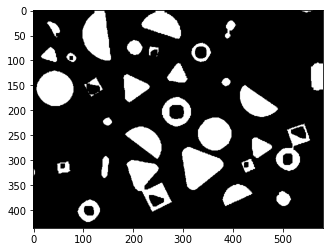

In [24]:
kernel = np.ones((7,7), dtype = np.uint8)

erosion = cv2.erode(dst, kernel, iterations=1)
plt.imshow(erosion, cmap='gray')
plt.show()

## Countours

In [25]:
contours, hier = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

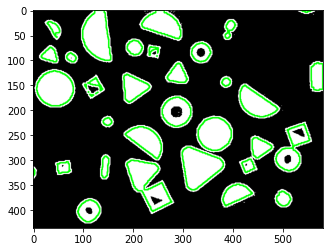

In [35]:
vis = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
img_cnts = cv2.drawContours(vis, contours, -1, (0,255,0), 2)
plt.imshow(img_cnts)
plt.show()

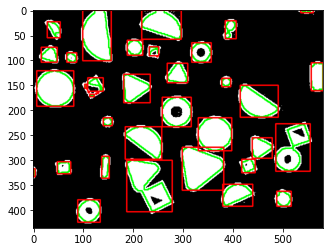

In [36]:
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img_cnts, (x,y), (x+w, y+h), (255,0,0), 2)

plt.imshow(img_cnts)
plt.show()

In [97]:
len(contours)

39

## Count letters

(178, 283)

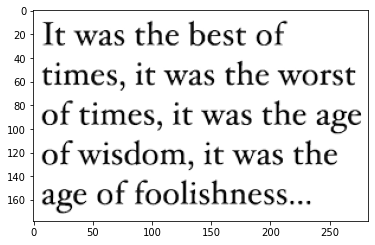

In [98]:
img = cv2.imread('small_text.png', 0)
display(img.shape)
plt.imshow(img, cmap='gray')
plt.show()

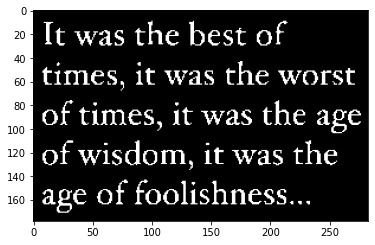

In [100]:
ret_o, dst_o = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(dst_o, cmap='gray')
plt.show()

In [103]:
contours, hier = cv2.findContours(dst_o, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

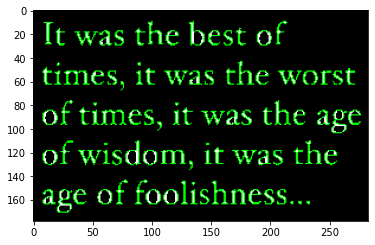

In [112]:
vis = cv2.cvtColor(dst_o, cv2.COLOR_GRAY2BGR)
img_cnts = cv2.drawContours(vis, contours, -1, (0,255,0), 1)
plt.imshow(img_cnts)
plt.show()

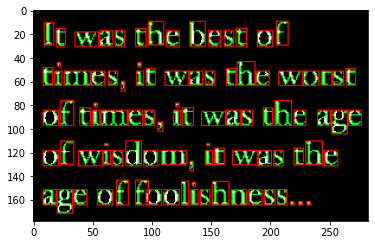

In [113]:
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img_cnts, (x,y), (x+w, y+h), (255,0,0), 1)

plt.imshow(img_cnts)
plt.show()

In [114]:
len(contours)

98